In [32]:
import pandas as pd
import yfinance as yf

In [33]:
# My excel link is different from yours, mines prob wrong, its ok for now i dont think it changes anything
tickers = pd.read_excel('https://www.ssga.com/us/en/institutional/ic/library-content/products/fund-data/mf/us/holdings-monthly-us-en-svspx.xlsx', header = 2).Ticker.dropna().to_list()
data = yf.download(tickers = tickers, period = '1y')['Adj Close']
sp500 = data.dropna(how= 'all', axis= 1)
sp500


[*********************100%%**********************]  504 of 504 completed


4 Failed downloads:
['K.WI', 'BRK.B', 'R_SP50']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=1y)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-23,154.260193,14.42,150.230301,153.200974,96.629997,103.940674,58.049999,289.923737,335.779999,166.081024,...,74.773018,67.014366,109.859184,30.506021,111.796005,124.188957,117.112793,270.660004,49.063728,149.109833
2022-11-25,155.858887,14.50,147.286728,153.422058,97.669998,104.862236,58.730000,291.764496,334.299988,164.009933,...,74.346367,67.430786,109.472382,30.998371,112.042793,124.780663,118.303673,271.899994,49.282764,148.743179
2022-11-28,151.231583,13.83,143.418350,152.278244,95.300003,103.323029,58.020000,286.055237,328.970001,160.986725,...,77.590897,67.198372,106.184639,29.993979,108.202728,124.701767,116.775375,269.000000,47.835228,146.791000
2022-11-29,149.881134,14.14,140.385315,152.057190,95.379997,102.940681,58.980000,283.476196,326.779999,160.868927,...,79.664612,66.675430,106.890541,29.747801,108.469269,124.297440,118.095261,266.820007,48.597088,146.513535
2022-11-30,153.892776,14.43,147.207169,154.921448,102.139999,105.470078,59.910000,296.223663,344.929993,168.741089,...,83.008369,68.002159,107.664124,29.797039,110.907555,126.881226,119.186905,270.279999,49.349426,152.746674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,114.190002,12.19,189.710007,138.279999,126.279999,100.260002,83.709999,327.320007,602.059998,179.839996,...,85.809998,60.700001,102.459999,29.600000,100.929672,127.830002,111.550003,215.479996,35.709999,176.539993
2023-11-17,113.150002,12.29,189.690002,138.300003,127.150002,99.550003,83.599998,327.829987,602.659973,183.050003,...,86.870003,60.560001,104.959999,29.690001,100.830002,127.660004,111.669998,218.020004,36.070000,174.800003
2023-11-20,113.980003,12.40,191.449997,138.309998,129.699997,101.199997,84.459999,330.899994,612.700012,183.820007,...,87.169998,60.060001,104.500000,29.940001,100.209999,128.119995,112.500000,220.539993,35.779999,176.059998


<Axes: xlabel='Date'>

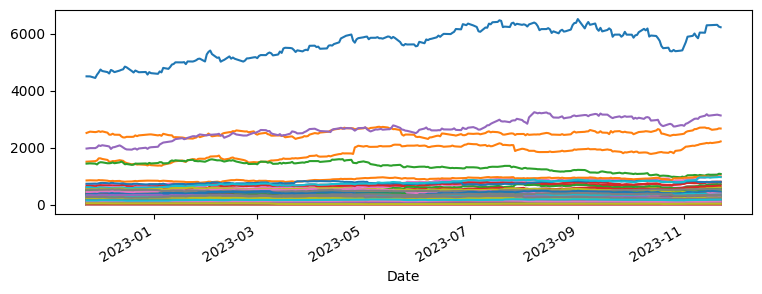

In [42]:

# I graphed each stock in sp500, to visualize the lines were analyzing
# Our trend line would follow Y = mx+b, we need the slope for each stock
sp500.plot(figsize = (9,3),legend= None) 

In [35]:
# Slope is our (y2-y1)[change of price] 
# divided by (x1-x2)[change of 1 year]
open_price = sp500.iloc[0] # first data entry
close_price = sp500.iloc[-1] # most recent data entry
price_difference = close_price - open_price
# Since our change of time is 1 year, im just going to divide by count of rows
slope = price_difference / len(sp500) * 100
slope

A      -12.059839
AAL     -0.840637
AAPL    16.366413
ABBV    -5.868913
ABNB    12.912349
          ...    
YUM      1.892847
ZBH     -1.307885
ZBRA   -17.848607
ZION    -5.838139
ZTS     12.047878
Length: 500, dtype: float64

In [36]:
# Im assuming 260 day low refers to trading days in year
# Since we have roughly 251 rows of data, well get the low of what we have already
# Take the difference with our current price, then divide over the low
present_low_change = close_price - sp500.min()
percent_above_260 = (present_low_change / sp500.min()) * 100
percent_above_260 

A       22.556094
AAL     12.728941
AAPL    53.878835
ABBV     6.713816
ABNB    56.431078
          ...    
YUM     10.916131
ZBH     10.815810
ZBRA    14.076466
ZION    79.888181
ZTS     27.034482
Length: 500, dtype: float64

In [37]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)
# notice the equation is same
# time period changes, im just gonna run a for loop with the formula
# and change the times for 4wk (20 data entries) and 52wk(all data entries)
data_indexes = (20, len(sp500))
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= close_price - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


#Note : he doesnt want us to use for loops but this one only loops twice, 
# and I only did it because the formula is redundant so I didnt want to write it twice 

A       59.971728
AAL     75.027089
AAPL     5.883119
ABBV   -16.019427
ABNB    30.060465
          ...    
YUM     49.887471
ZBH     73.898444
ZBRA    81.003344
ZION    29.850114
ZTS     25.347578
Length: 500, dtype: float64

In [40]:
# 39 week returns sounds simple
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries

price_39_weeks_ago = sp500.iloc[-195] # 195 data entries away (39 weeks | 5 entries per week)
price_difference_39_weeks = close_price - price_39_weeks_ago
price_difference_39_weeks # I think this is all we need for the return, right?



A      -13.805217
AAL     -2.302563
AAPL    18.773099
ABBV    -4.156236
ABNB    -4.087180
          ...    
YUM     -0.466457
ZBH     -6.131420
ZBRA   -51.876917
ZION    -8.036755
ZTS      2.822845
Length: 500, dtype: float64